  # Boston Housing using Regression Models

  ---

  **Problem Statement**: Predicting median value of owner-occupied homes in $1000's from dataset using given features.


  &nbsp;


  **Solution by**: *Aditya Karanth*.

  **GitHub Profile**: https://github.com/Aditya-Karanth

  **Kaggle Profile**: https://www.kaggle.com/adityakaranth

---

 **<h3>Project Planning :</h3>**

  - **Imports :**
    - Contains the necessary Imports
    - Loading Data set and its description

  - **Exploratory Data Analysis (EDA) :**
    - Understand nature of the data *.info()*, *.describe()*
    - Univariate Analysis by plotting histograms.
    - Understand the correlation between features using heatmaps.
    - Plotting scatterplots for bivariate numeric data.
    
  - **Data Preprocessing :**

    - **Removing Outliers :**
      - Removing outliers present in data using *IsolationForest*.
      - Plotting scatterplots for features *before* and *after* removing outliers.
    
  - **Model Selection :**  
    - *GridSearchCV* - selecting best algorithm among *LinearRegression*, *Ridge (L2 Regularization)*, *Lasso (L1 Regularization)* and best params with hyperparameter tuning using *r2 score*.

    - **Training and Testing the Model**:
      - Regression using best algorithm from GridSearchCV.
      - Obtaining *coefficients* of the model.
      - Evaluation of Regression model with **MSE** and **RMSE**.
      - Plotting  *Actual v/s Predicted* values.

# Imports

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (12,8)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics

## Data set

In [ ]:
# Importing data set from sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
# Exploring boston data set
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
# About dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# Creating a DataFrame of Data
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# Check target of dataset
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [ ]:
# Add MEDV(target) to df
target = pd.Series(boston.target, name='Target')
df['MEDV'] = target

# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
# Get numeric columns
print('Numeric cols :',df.select_dtypes(include=[np.number]).columns.values)

Numeric cols : ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'MEDV']


In [ ]:
# Get Non-numeric columns
print('Categorical cols :',df.select_dtypes(exclude=[np.number]).columns.values)

Categorical cols : []


In [ ]:
# Number of missing values
print(df.isnull().sum().sort_values(ascending=False))

MEDV       0
LSTAT      0
B          0
PTRATIO    0
TAX        0
RAD        0
DIS        0
AGE        0
RM         0
NOX        0
CHAS       0
INDUS      0
ZN         0
CRIM       0
dtype: int64


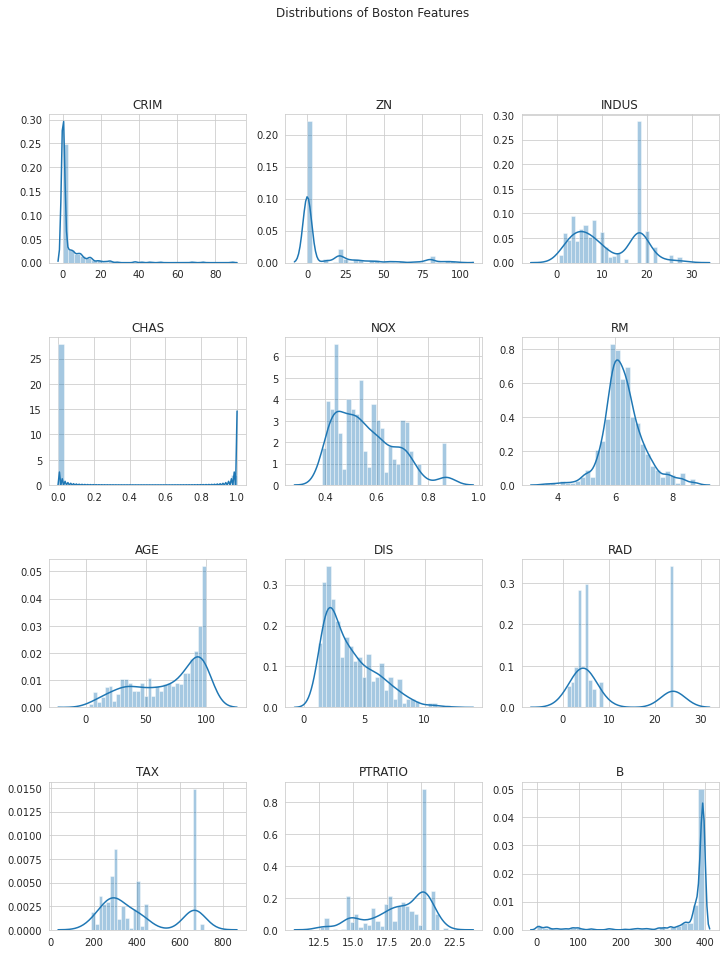

In [ ]:
# Univariate Analysis
fig, axes = plt.subplots(4,3, figsize=(12,15), gridspec_kw={'hspace':0.5,})
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Boston Features')
for ax, cols in zip(axes.flatten(), df.columns[:-1]):
  sns.distplot(df[cols], ax=ax, bins=30) 
  ax.set(title=cols.upper(), xlabel='')

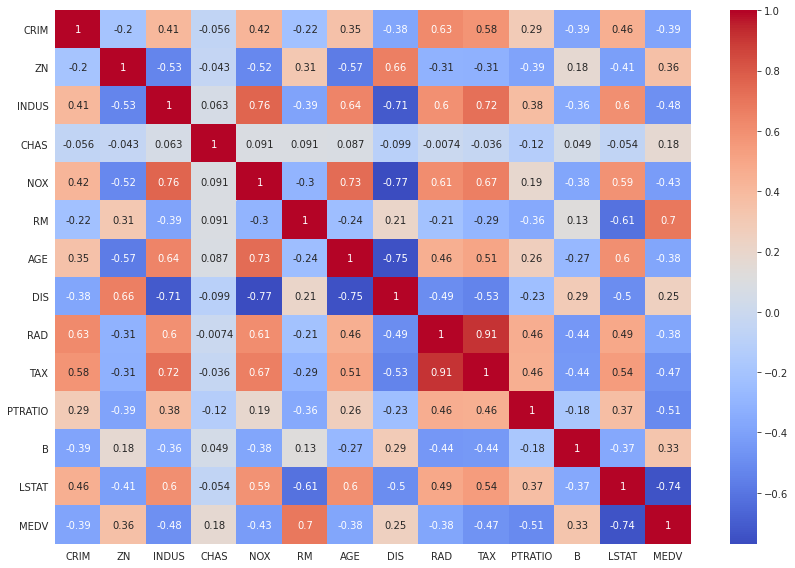

In [ ]:
# Correlation plot
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.tight_layout()

In [ ]:
# Correlation with Target
df.corr()['MEDV'].sort_values(ascending=False)[1:]

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

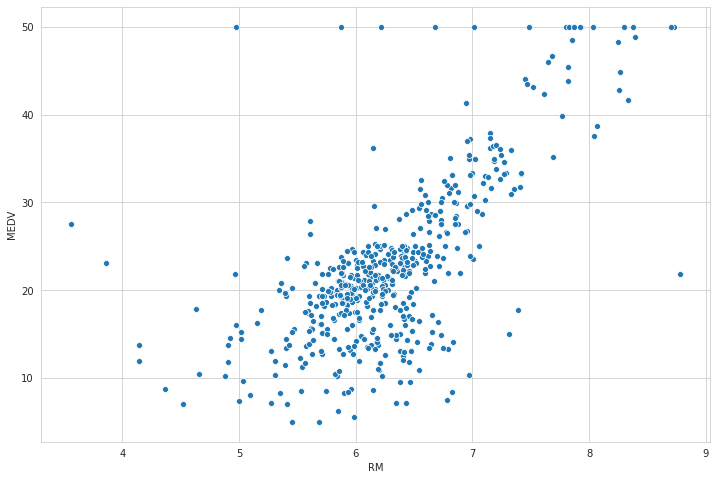

In [ ]:
# As rooms increases price increases
# Notice there are some outliers, ex: when MEDV = 50
sns.scatterplot('RM', 'MEDV', data=df)

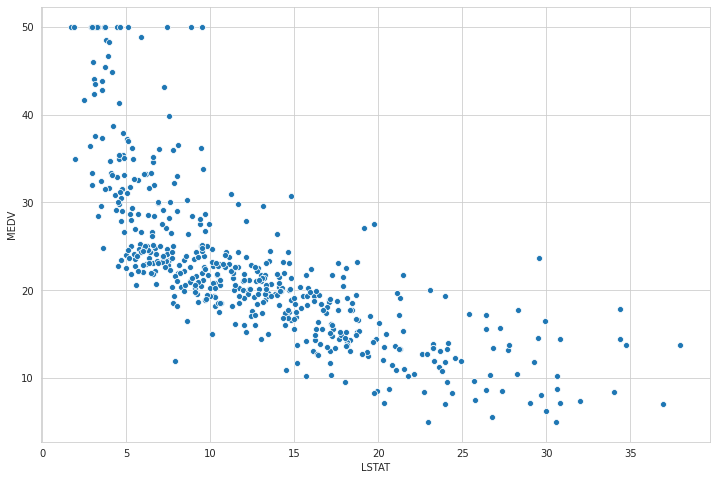

In [ ]:
# As % lower status of the population increases Target decreases
# Notice there are some outliers
sns.scatterplot( 'LSTAT','MEDV', data=df)

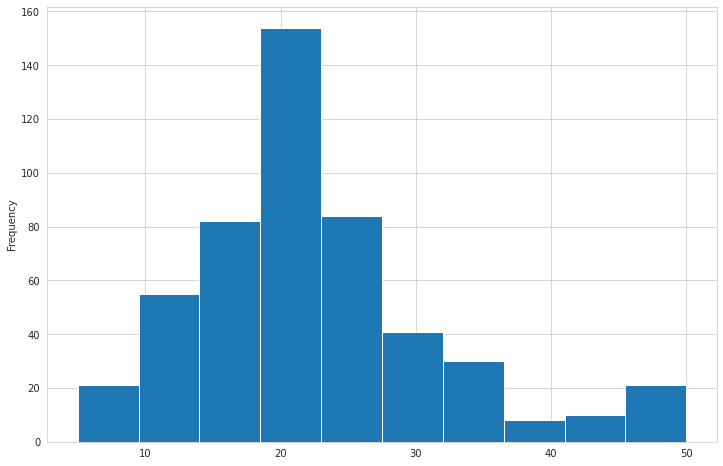

In [ ]:
#  Distribution of MEDV
df['MEDV'].plot.hist()

# Data Preprocessing

In [ ]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Removing Outliers

In [ ]:
# Removing outliers using IsolationForest
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.2)
yhat = iso.fit_predict(X_train)

In [ ]:
# select all rows that are not outliers
mask = yhat != -1
X_train_iso, y_train_iso = X_train.loc[mask, :], y_train.loc[mask]
print('Before: ',X_train.shape, y_train.shape)
print('Updated: ',X_train_iso.shape, y_train_iso.shape)

Before:  (379, 13) (379,)
Updated:  (303, 13) (303,)


[Text(0.5, 1.0, 'Updated')]

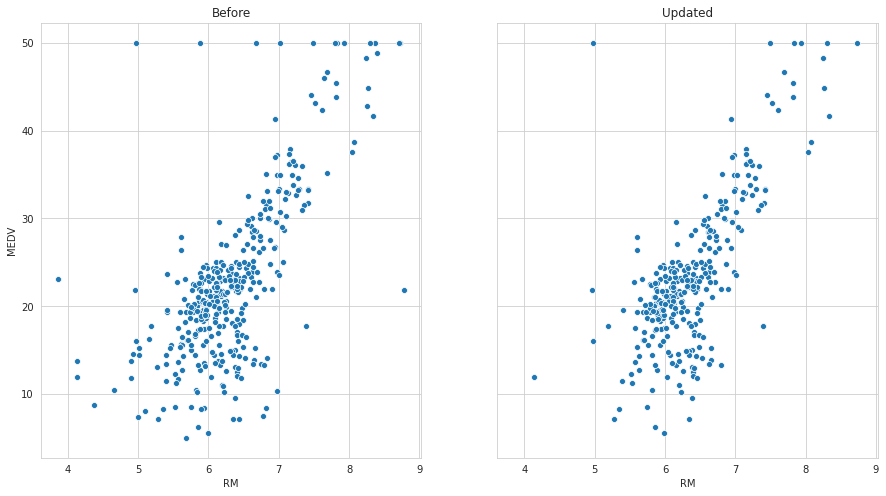

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(15,8))
sns.scatterplot(X_train['RM'],y_train, ax=ax1)
sns.scatterplot(X_train_iso['RM'],y_train_iso, ax=ax2)
ax1.set(title='Before')
ax2.set(title='Updated')

[Text(0.5, 1.0, 'Updated')]

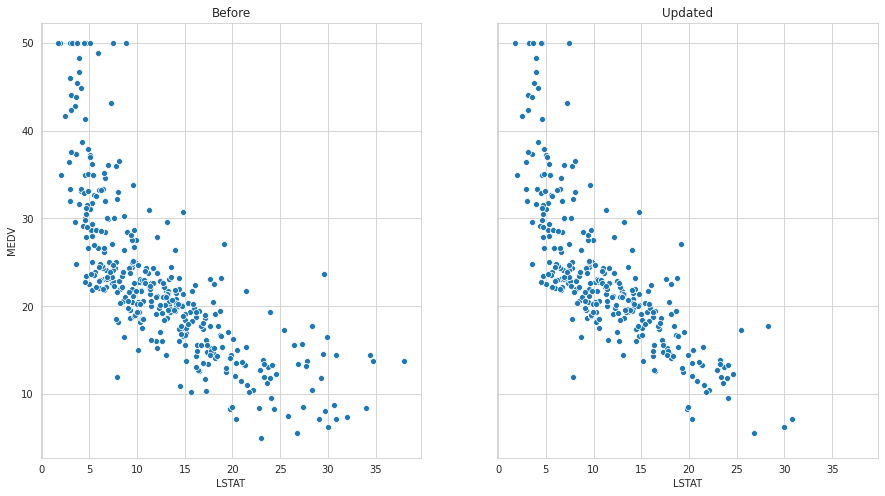

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(15,8))
sns.scatterplot(X_train['LSTAT'],y_train, ax=ax1)
sns.scatterplot(X_train_iso['LSTAT'],y_train_iso, ax=ax2)
ax1.set(title='Before')
ax2.set(title='Updated')

# Model Selection

In [ ]:
# Function to compare models and parameters
def find_best_model(X,y):
  models = {
      'Linear Regression':{
          'model':LinearRegression(),
          'parameters':{
              'normalize':[True,False]
              }
          },
        'Ridge':{
            'model':Ridge(),  # L2 Reguralization
            'parameters':{
                'normalize':[True,False],
                'alpha':[0.1,0.5,1,10,100]
                }
          },
        'Lasso':{
            'model':Lasso(),  # L1 Regularization
            'parameters':{
                'normalize':[True,False],
                'alpha':[0.1,0.5,1,10,100]
                }
        }
  }

  scores = []
  for model_name, model_params in models.items():
    gs = GridSearchCV(estimator = model_params['model'],
                      param_grid = model_params['parameters'],
                      scoring='r2',
                      cv=10,
                      n_jobs = -1)
    gs.fit(X,y)   # Search for best model and parameters
    scores.append({
        'Model' : model_name,
        'Best_params':gs.best_params_,
        'R^2':gs.best_score_,
         })
  result = pd.DataFrame(scores)  # Result obatined after searching 
  return result.sort_values('R^2', ascending=False) # Higher values the better

In [ ]:
# Performance on training set after parameter hypertuning without removing outliers
find_best_model(X_train,y_train)

,Model,Best_params,R^2
1,Ridge,"{'alpha': 0.1, 'normalize': False}",0.716060
0,Linear Regression,{'normalize': False},0.716013
2,Lasso,"{'alpha': 0.1, 'normalize': False}",0.705248


In [ ]:
# Performance on training set after parameter hypertuning by removing outliers
find_best_model(X_train_iso,y_train_iso)

,Model,Best_params,R^2
1,Ridge,"{'alpha': 0.1, 'normalize': True}",0.755692
0,Linear Regression,{'normalize': True},0.752439
2,Lasso,"{'alpha': 0.1, 'normalize': False}",0.751597


## Training and Testing the Model

In [ ]:
# Ridge and Linear Regression r2 scores are same
# R² value of 0.75 means that the model is accounting for 75% of the variability in the data

rid = Ridge(alpha=0.1, normalize=True) # selecting ridge and best parameters
rid.fit(X_train_iso, y_train_iso)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
# Coefficients
coeff_df = pd.DataFrame(rid.coef_, X.columns, columns=['Coefficient'])    
coeff_df

,Coefficient
CRIM,-0.133416
ZN,0.005223
INDUS,0.001199
CHAS,-0.433059
NOX,-4.560141
RM,5.288827
AGE,-0.015566
DIS,-0.887578
RAD,0.098814
TAX,-0.005673


In [ ]:
# Predictions
y_pred = rid.predict(X_test)
print(y_pred)

[27.68971963 31.60667278 15.35021594 25.02465099 18.08778004 22.27850862
 16.98291866 13.90141232 20.61408816 20.2097378  19.55956633 18.31726066
 -9.78714626 21.41108754 18.64247721 25.48842671 18.52320625  2.40636013
 39.48907458 16.53987694 26.69227837 28.48586253 10.9020896  24.90115829
 16.95703436 12.79542274 22.13208627 15.49098781 17.65720688 18.89176271
 20.04673533 25.54922536 24.80131107 17.16108266 14.2758023  18.54828122
 32.17512433 20.4668736  19.76001209 24.73652335 12.86094736 30.23927457
 40.88606937 16.8869966  26.76224096 15.29147611 13.58314039 26.17082064
 18.28893295 30.34880234 20.95439845 33.59524196 15.91636501 26.74549216
 39.33379464 21.90328006 18.14394039 31.11903926 24.89260972 12.23750207
 23.66942704 30.48518702 31.1971528  16.34688647 22.69526528 11.01905296
 19.22128116 25.53136635 29.39751637 12.04726727 19.61553832 26.03690588
 10.01684309 17.51256331 23.02630597  2.58093277 20.95707682 39.40583035
 16.76426203  8.73170526 20.89211497  9.69894273 20

In [ ]:
# DataFrame temp with Actual and Predicted values
temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
temp

,Actual,Predicted
173,23.6,27.689720
274,32.4,31.606673
491,13.6,15.350216
72,22.8,25.024651
452,16.1,18.087780
...,...,...
418,8.8,2.568023
117,19.2,23.109752
42,25.3,26.059575
322,20.4,23.085753


Model Evaluation -

In [ ]:
# MSE and RMSE
print('MSE :',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE :',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MSE : 3.2452809696993485
RMSE : 1.8014663387638827


Text(0, 0.5, 'Predicted')

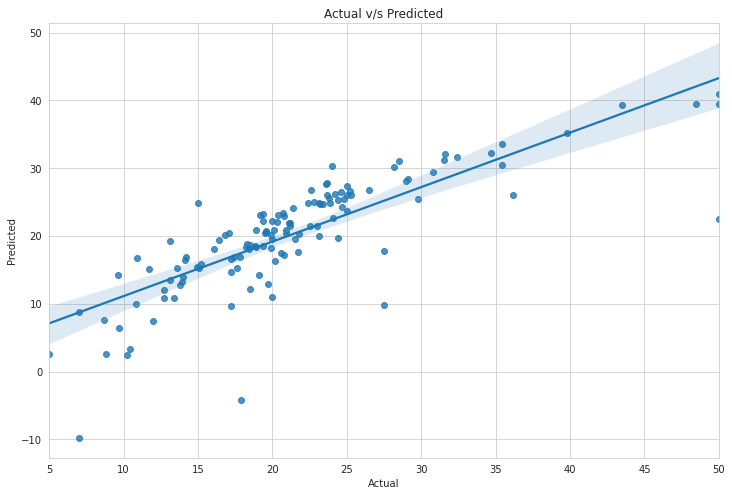

In [ ]:
# Plotting "Actual v/s Predicted"
sns.regplot(y_test, y_pred, scatter=True)
plt.title("Actual v/s Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")